<font size="6">Football Market Value Prediction using Machine Learning</font>

<font size="4">1. Data Preprocessing</font>

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile
import pandasql as psql

In [29]:
data = {}

for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        if filename[-4:] == '.csv':
            data[str(filename [:-4])] = pd.read_csv(os.path.join(dirname, filename))
            
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        if filename[-4:] == '.csv':
            data[str(filename [:-4])] = pd.read_csv(os.path.join(dirname, filename))
            
special_character_conversion = {'\'': '', 'ä': 'a', 'ó': 'o', 'Ł': 'L', 'ç': 'c', 'í': 'i', 'ü': 'u', 'ń': 'n', 'ß': 's', 'ö': 'o', '-': ' ', 'ï': 'i',
'É': 'E', 'ø': 'o', 'ğ': 'g', 'ě': 'e', 'ć': 'c', 'á': 'a', 'é': 'e', 'İ': 'I', 'ú': 'u', 'ş': 's', 'ë': 'e', 'Ü': 'U', 'Ç': 'C', 'ã': 'a',
'č': 'c', 'Ø': 'O', 'š': 's', 'ð': 'd', 'Ș': 'S', 'Ñ': 'N', 'ă': 'a', 'ý': 'y', 'è': 'e', 'ô': 'o', 'ō': 'o', 'ř': 'r', 'ț': 't', 'ò': 'o',
'ł': 'l', 'Ó': 'O', 'ı': 'i', 'Ö': 'O', 'î': 'i', 'æ': 'e', 'ę': 'e', 'ñ': 'n', 'ą': 'a', 'Á': 'A', 'Đ': 'D', 'Ľ': 'L', 'ó': 'o', 'å': 'a',
'Ć': 'C', 'é': 'e', '.': '', 'ž': 'z', 'ș': 's', 'à': 'a', 'ê': 'e', 'Š': 'S', ',': ' ', '▲': '', 'â': 'a', 'Ž': 'Z', 'ů': 'u', 'Ş': 'S',
'Ż': 'Z', 'Č': 'C', 'ì': 'i'}

def replace_special_chars(str):
    if type(str) == float:
        return ''
    for key, val in special_character_conversion.items():
        str = str.replace(key, val)
    return str

data['players']['name'] = data['players']['name'].apply(replace_special_chars)
data['player_id_mapping']['player_name'] = data['player_id_mapping']['player_name'].apply(replace_special_chars)
data['players_stats_per_season']['team>name'] = data['players_stats_per_season']['team>name'].apply(replace_special_chars)
data['clubs']['name'] = data['clubs']['name'].apply(replace_special_chars)

<font size="4">2. Data Profiling</font>

Players Dataset

In [30]:
data['players'].head(10)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lucio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
5,109,NaN,Dedê,Dede,2013,825,dede,Brazil,Belo Horizonte,Brazil,...,NaN,NaN,NaN,Football Concept,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dede/profil/sp...,TR1,Eskisehirspor,400000.0,9500000.0
6,123,Christoph,Metzelder,Christoph Metzelder,2012,33,christoph-metzelder,Germany,Haltern,Germany,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/christoph-metz...,L1,FC Schalke 04,1500000.0,9500000.0
7,132,Tomas,Rosicky,Tomas Rosicky,2015,11,tomas-rosicky,CSSR,Praha,Czech Republic,...,both,179.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tomas-rosicky/...,GB1,Arsenal Football Club,350000.0,17500000.0
8,162,Marc,Ziegler,Marc Ziegler,2012,79,marc-ziegler,Germany,Blieskastel,Germany,...,right,193.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/marc-ziegler/p...,L1,Verein für Bewegungsspiele Stuttgart 1893,200000.0,1250000.0
9,215,Roque,Santa Cruz,Roque Santa Cruz,2015,1084,roque-santa-cruz,Paraguay,Asunción,Paraguay,...,right,193.0,2023-12-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roque-santa-cr...,ES1,Málaga CF,250000.0,12000000.0


Player Valuations Dataset

In [31]:
data['player_valuations'].head(10)

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
5,26,2004-10-04,1500000,16,L1
6,65,2004-10-04,8000000,1091,GR1
7,77,2004-10-04,13000000,506,IT1
8,80,2004-10-04,400000,27,L1
9,109,2004-10-04,9500000,825,TR1


Clubs Dataset

In [32]:
data['clubs'].head(10)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e V,L1,NaN,31,26.7,11,35.5,1,Merck-Stadion am Böllenfalltor,17810,€-1.48m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,27,28.1,15,55.6,6,Yekaterinburg Arena,23000,€-895k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Besiktas Jimnastik Kulubu,TR1,NaN,37,26.3,17,45.9,13,Tüpraş Stadyumu,42590,€-26.00m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,27.0,18,69.2,16,Olimpico di Roma,73261,+€63.20m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.6,20,76.9,20,Tottenham Hotspur Stadium,62850,€-151.40m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
5,157,kaa-gent,Koninklijke Atletiek Associatie Gent,BE1,NaN,29,25.5,18,62.1,8,Planet Group Arena,19999,+€32.72m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/kaa-gent/start...
6,1894,hvidovre-if,Hvidovre Idretsforening,DK1,NaN,24,27.3,3,12.5,3,PRO VENTILATION Arena,12000,+€335k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/hvidovre-if/st...
7,190,fc-kopenhagen,Football Club Kobenhavn,DK1,NaN,28,26.1,15,53.6,9,Parken,38065,+€6.88m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-kopenhagen/...
8,192,roda-jc-kerkrade,Roda JC Kerkrade,NL1,NaN,25,24.0,9,36.0,0,Parkstad Limburg Stadion,19979,+€1.30m,NaN,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/roda-jc-kerkra...
9,19789,yeni-malatyaspor,Yeni Malatyaspor,TR1,NaN,10,22.9,1,10.0,0,Yeni Malatya Stadyumu,25745,+€778k,NaN,2021,../data/raw/transfermarkt-scraper/2021/clubs.j...,https://www.transfermarkt.co.uk/yeni-malatyasp...


Players Stats Per Season Dataset

In [33]:
data['players_stats_per_season'].head(10)

,Unnamed: 0,player_id,tournament_id,season_id,totalRating,countRating,goals,assists,goalsAssistsSum,yellowCards,...,touches,tacklesWon,tacklesWonPercentage,totwAppearances,shotsFromInsideTheBox,shotsFromOutsideTheBox,team>name,team>nameCode,team>ranking,team>id
0,1,1,52,10470,219.1,31.0,16.0,3.0,19.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Fenerbahce,FEN,NaN,3052.0
1,2,1,37,17353,185.5,25.0,17.0,4.0,21.0,0.0,...,948.0,3.0,33.333333,5.0,NaN,NaN,Feyenoord,FEY,NaN,2959.0
2,4,1,52,11927,166.2,24.0,9.0,3.0,12.0,4.0,...,NaN,NaN,NaN,2.0,NaN,NaN,Fenerbahce,FEN,NaN,3052.0
3,5,1,52,13575,13.1,2.0,0.0,0.0,0.0,0.0,...,20.0,NaN,NaN,NaN,NaN,NaN,Fenerbahce,FEN,NaN,3052.0
4,8,1,679,11774,33.0,5.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Fenerbahce,FEN,NaN,3052.0
5,9,1,679,10391,59.5,9.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Fenerbahce,FEN,NaN,3052.0
6,13,1,340,17466,7.1,1.0,0.0,0.0,0.0,0.0,...,34.0,1.0,50.000000,NaN,NaN,NaN,Feyenoord,FEY,NaN,2959.0
7,17,1,37,13399,82.7,12.0,5.0,1.0,6.0,0.0,...,235.0,NaN,NaN,NaN,NaN,NaN,Feyenoord,FEY,NaN,2959.0
8,22,2,242,11163,197.8,29.0,1.0,0.0,1.0,4.0,...,1806.0,NaN,NaN,NaN,NaN,NaN,LA Galaxy,GAL,NaN,2513.0
9,23,2,18,17473,54.3,8.0,0.0,2.0,2.0,2.0,...,412.0,6.0,54.545455,2.0,NaN,NaN,Derby County,DER,NaN,27.0


<font size="4">3. Data Processing</font>

In [34]:
#Drop columns that are not needed and process the data
data['players'] = data['players'][['player_id', 'name','date_of_birth', 'height_in_cm', 'foot', 'position']]
data['players']['date_of_birth'] = pd.to_datetime(data['players']['date_of_birth'], format = '%Y-%m-%d')
data['players']['position'] = data['players']['position'].astype('category').cat.codes
data['players']['foot'] = data['players']['foot'].astype('category').cat.codes


#Extract age as of 2021 from date of birth
data['players']['age'] = 2021 - data['players']['date_of_birth'].dt.year

In [35]:
stats_df = pd.merge(data['players_stats_per_season'], data['player_id_mapping'], on='player_id')
stats_df = pd.merge(stats_df, data['season_mapping'], on='season_id')

# Filter only top leagues and 2020/2021 season
stats_df = stats_df[stats_df['season_name'].str.startswith(('Premier League','Serie A','Bundesliga','Ligue 1','Eredivisie','Primeira Liga'), na=False)]
stats_df[['competition','season']] = stats_df["season_name"].str.rsplit(" ", n=1, expand=True)
stats_df = stats_df[stats_df['season'].str.endswith('21', na=False)]
stats_df

,Unnamed: 0_x,player_id,tournament_id,season_id,totalRating,countRating,goals,assists,goalsAssistsSum,yellowCards,...,team>name,team>nameCode,team>ranking,team>id,Unnamed: 0_y,player_name,Unnamed: 0,season_name,competition,season
100,416,273,35,28210,58.1,8.0,2.0,1.0,3.0,4.0,...,VfB Stuttgart,STU,NaN,2677.0,221933,Gonzalo Castro,221903,Bundesliga 20/21,Bundesliga,20/21
262,980,518,34,28222,52.8,7.0,1.0,1.0,2.0,2.0,...,AS Monaco,MON,NaN,1653.0,89182,Cesc Fabregas,212797,Ligue 1 20/21,Ligue 1,20/21
419,1570,750,23,32523,40.9,5.0,8.0,1.0,9.0,0.0,...,Juventus,JUV,NaN,2687.0,87078,Cristiano Ronaldo,252365,Serie A 20/21,Serie A,20/21
460,1671,768,17,29415,19.3,3.0,0.0,0.0,0.0,2.0,...,Burnley,BUR,NaN,6.0,130462,Phil Bardsley,130081,Premier League 20/21,Premier League,20/21
510,1778,791,17,29415,41.7,6.0,0.0,1.0,1.0,0.0,...,Liverpool,LIV,NaN,44.0,130199,James Milner,130081,Premier League 20/21,Premier League,20/21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123369,142650,870040,45,29401,19.7,3.0,0.0,0.0,0.0,2.0,...,Flyeralarm Admira,FAD,NaN,2050.0,172069,Milos Spasic,171866,Bundesliga 20/21,Bundesliga,20/21
123417,142754,870188,238,32456,26.1,4.0,0.0,0.0,0.0,0.0,...,Rio Ave,RAV,NaN,3036.0,60639,Gabrielzinho,60301,Primeira Liga 20/21,Primeira Liga,20/21
123871,143286,870893,23,32523,6.6,1.0,0.0,0.0,0.0,0.0,...,Spezia,SPE,NaN,2735.0,252714,Leo Sena,252365,Serie A 20/21,Serie A,20/21
124163,143714,871706,34,28222,70.6,10.0,2.0,1.0,3.0,1.0,...,FC Nantes,NAN,NaN,1647.0,212876,Randal Kolo Muani,212797,Ligue 1 20/21,Ligue 1,20/21


In [36]:
transfermarkt_df = pd.merge(data['player_valuations'], data['players'], on='player_id')
# transfermarkt_df = pd.merge(transfermarkt_df, data['clubs'], left_on='current_club_id', right_on='club_id')
transfermarkt_df[['year','month','date']] = transfermarkt_df["date"].str.split("-", n=2, expand=True)
# Filter only 2021
transfermarkt_df=transfermarkt_df[transfermarkt_df['year'] == '2021']
# Filter last valuation update of each player
max_indices = transfermarkt_df.groupby('player_id')['month'].idxmax()
transfermarkt_df = transfermarkt_df.loc[max_indices]


In [37]:
results_df = pd.merge(stats_df, transfermarkt_df, left_on='player_name', right_on='name')
results_df.drop(results_df.columns[results_df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
# Drop unrelated columns
results_df.drop(results_df.columns[results_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
results_df.drop(columns=['id', 'type','player_id_x','player_id_y','current_club_id','date','year','month','season_id','season_name','competition','season','team>name', 'team>nameCode', 'team>ranking', 'team>id','player_club_domestic_competition_id','tournament_id','name','date_of_birth'], inplace=True)

for col in results_df.columns:
    print(col)

totalRating
countRating
goals
assists
goalsAssistsSum
yellowCards
directRedCards
redCards
minutesPlayed
matchesStarted
scoringFrequency
yellowRedCards
substitutionsIn
substitutionsOut
appearances
rating
bigChancesCreated
bigChancesMissed
accuratePasses
inaccuratePasses
totalPasses
accuratePassesPercentage
accurateOwnHalfPasses
accurateOppositionHalfPasses
accurateFinalThirdPasses
keyPasses
successfulDribbles
successfulDribblesPercentage
tackles
interceptions
accurateCrosses
accurateCrossesPercentage
totalShots
shotsOnTarget
shotsOffTarget
groundDuelsWon
groundDuelsWonPercentage
aerialDuelsWon
aerialDuelsWonPercentage
totalDuelsWon
totalDuelsWonPercentage
goalConversionPercentage
penaltiesTaken
penaltyGoals
penaltyWon
penaltyConceded
shotFromSetPiece
freeKickGoal
goalsFromInsideTheBox
goalsFromOutsideTheBox
headedGoals
leftFootGoals
rightFootGoals
accurateLongBalls
accurateLongBallsPercentage
clearances
errorLeadToGoal
errorLeadToShot
dispossessed
wasFouled
fouls
hitWoodwork
ownGoals
dr

<font size="4">4. Data Visualization</font>

In [38]:
# Extract name
name_column = results_df['player_name'] 
results_df.drop('player_name', axis=1, inplace=True)

Heatmap

/opt/miniconda3/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

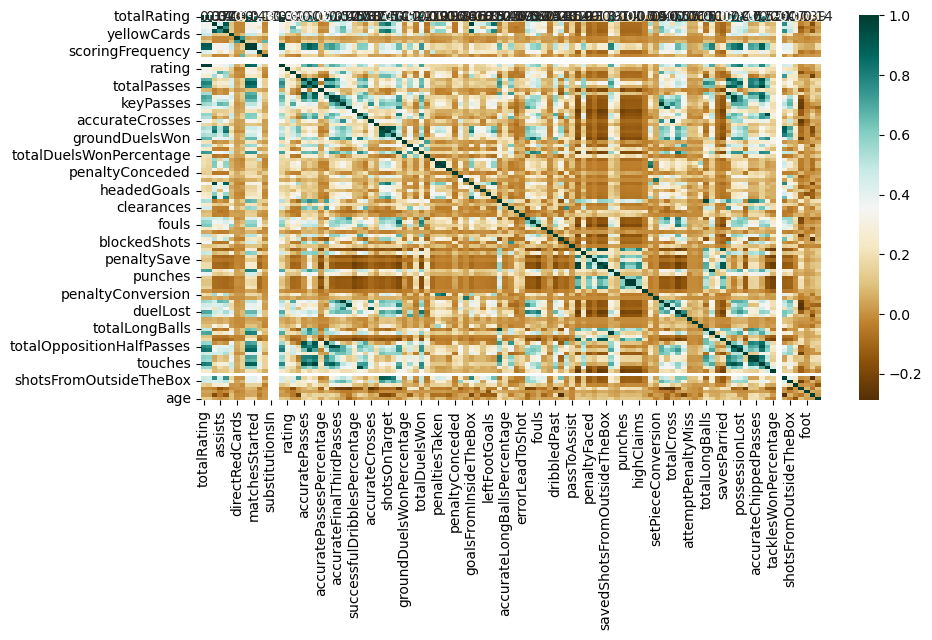

In [39]:
plt.figure(figsize=(10,5))
c= results_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

Histogram of Some Features

/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

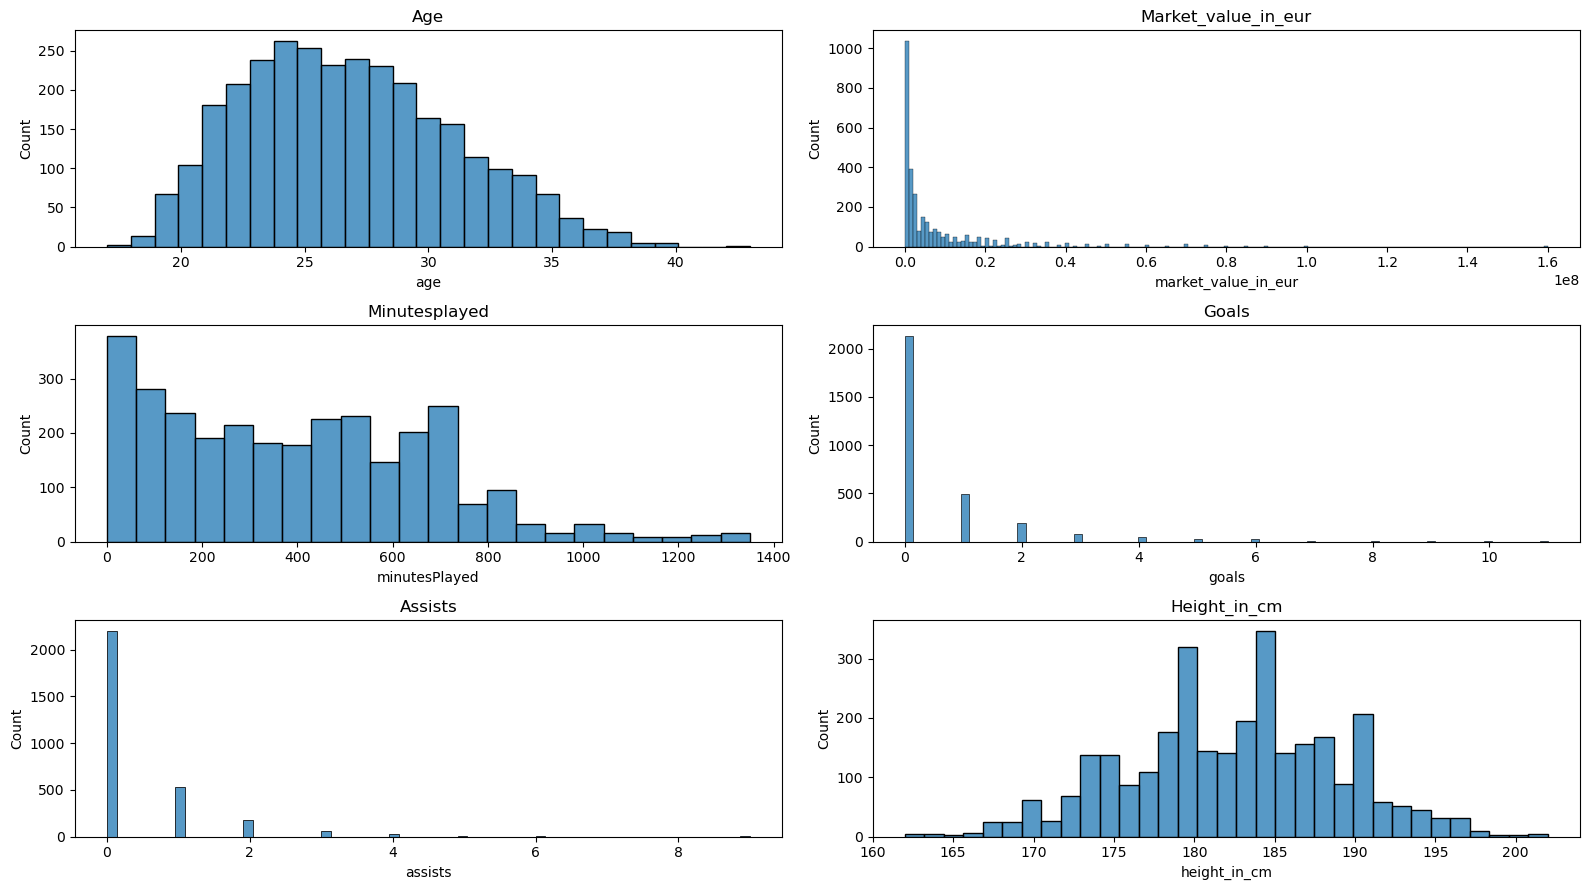

In [40]:
features = [
    'age',
    'market_value_in_eur',
    'minutesPlayed',
    'goals',
    'assists',
    'height_in_cm',
]

fig, axes = plt.subplots(3, 2, figsize=(16, 9))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.histplot(data=results_df, x=feature, ax=axes[i], kde=False)
    axes[i].set_title(feature.capitalize())
    

fig.tight_layout()

plt.show()

/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping wi

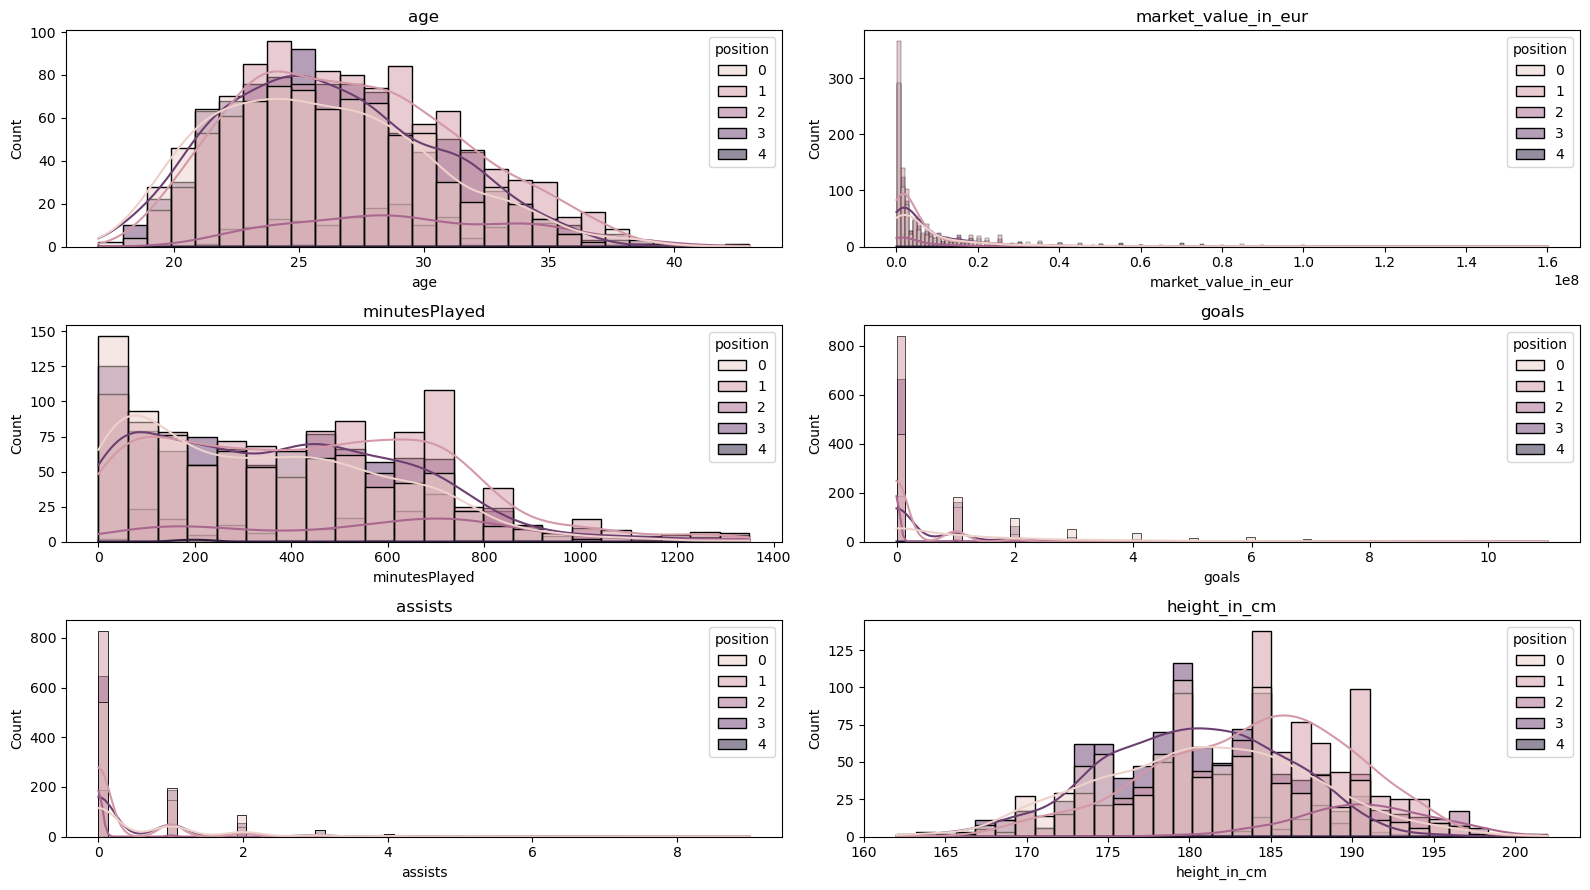

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(16, 9))
axes = axes.ravel()

# Define the order of positions
position_order = ['Defender', 'Midfielder', 'Attacker']

# Iterate over each column and create a histogram sorted by player position
for i, column in enumerate(features):
	sns.histplot(data=results_df, x=column, hue='position', hue_order=position_order, ax=axes[i], kde=True)
	axes[i].set_title(column)

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()
